# Analyse Tokenizers

In [21]:
import json
import collections
import statistics

# import modules
from matplotlib_venn import venn2,venn2_circles, venn3, venn3_circles
from matplotlib import pyplot as plt

## Scenario 1
### HF 5M Tokenizer

In [2]:
path = '/scratch/jbusch/ma/tokenizer/hf_tokenizer/scenario1/tokenizer_hf_dnabert_HF_5M_NRC.json'
with open (path, 'r') as f:
	HF_5M_NRC = json.load(f)

len(HF_5M_NRC['model']['vocab'])

4096

In [3]:
hf_5M_nrc_tokens = list(HF_5M_NRC['model']['vocab'].keys())

### HS 5M Tokenizer

In [4]:
path = '/scratch/jbusch/ma/tokenizer/hs_tokenizer/scenario1/HS_5M_NRC/vocab.json'
with open (path, 'r') as f:
	HS_5M_NRC = json.load(f)

len(HS_5M_NRC['model']['substitutions'])

4096

In [5]:
hs_5M_nrc_tokens = []
for item in HS_5M_NRC['model']['substitutions']:
	hs_5M_nrc_tokens.append(item['sequence'])

### Compare the tokenizers

In [6]:
# adapted from https://stackoverflow.com/questions/5094083/find-the-overlap-between-2-python-lists (22.07.2025)
hf_multiset = collections.Counter(hf_5M_nrc_tokens)
hs_multiset = collections.Counter(hs_5M_nrc_tokens)

overlap = list((hf_multiset & hs_multiset).elements())

print(f'Overlap: {len(overlap)}')

Overlap: 1105


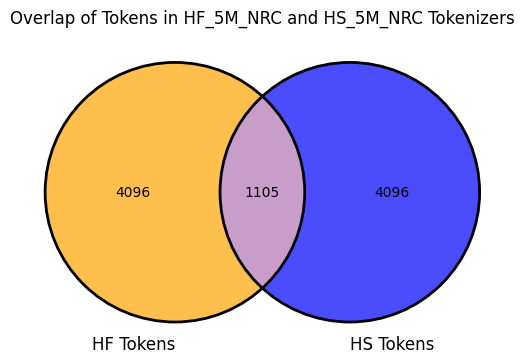

In [19]:
# depict venn diagram
venn2(subsets = (len(HF_5M_NRC['model']['vocab']), len(HS_5M_NRC['model']['substitutions']), len(overlap)),
	 set_labels = ('HF Tokens', 'HS Tokens'),
	 set_colors = ('orange', 'blue'),
	 alpha = 0.7)
venn2_circles(subsets=(len(HF_5M_NRC['model']['vocab']),len(HS_5M_NRC['model']['substitutions']), len(overlap)))
plt.title("Overlap of Tokens in HF_5M_NRC and HS_5M_NRC Tokenizers") 
plt.show()

### Average Token Length

In [50]:
lens_hf_5M_nrc_tokens = []
for token in hf_5M_nrc_tokens:
	lens_hf_5M_nrc_tokens.append(len(token))

avg_hf_5M_nrc = statistics.mean(lens_hf_5M_nrc_tokens)
median_hf_5M_nrc = statistics.median(lens_hf_5M_nrc_tokens)
print(f'Average token length HF 5M NRC: {avg_hf_5M_nrc}')
print(f'Median token length HF 5M NRC: {median_hf_5M_nrc}')

Average token length HF 5M NRC: 6.850341796875
Median token length HF 5M NRC: 7.0


In [49]:
lens_hs_5M_nrc_tokens = []
for token in hs_5M_nrc_tokens:
	lens_hs_5M_nrc_tokens.append(len(token))

avg_hs_5M_nrc = statistics.mean(lens_hs_5M_nrc_tokens)
median_hs_5M_nrc = statistics.median(lens_hs_5M_nrc_tokens)
print(f'Average token length HS 5M NRC: {avg_hs_5M_nrc}')
print(f'Median token length HS 5M NRC: {median_hs_5M_nrc}')

Average token length HS 5M NRC: 5.900390625
Median token length HS 5M NRC: 6.0


## Scenario 2
### HF 5M RC Tokenizer

In [23]:
path = '/scratch/jbusch/ma/tokenizer/hf_tokenizer/scenario2/tokenizer_hf_dnabert_HF_5M_rc_split.json'
with open (path, 'r') as f:
	HF_5M_RC = json.load(f)

len(HF_5M_RC['model']['vocab'])

4096

In [24]:
hf_5M_rc_tokens = list(HF_5M_RC['model']['vocab'].keys())

### HF 2.5M NRC Tokenizer

In [25]:
path = '/scratch/jbusch/ma/tokenizer/hf_tokenizer/scenario2/tokenizer_hf_dnabert_HF_2_5M_split.json'
with open (path, 'r') as f:
	HF_2_5M_NRC = json.load(f)

len(HF_2_5M_NRC['model']['vocab'])

4096

In [26]:
hf_2_5M_nrc_tokens = list(HF_2_5M_NRC['model']['vocab'].keys())

### HS 2.5M Tokenizer

In [27]:
path = '/scratch/jbusch/ma/tokenizer/hs_tokenizer/scenario2/HS_2_5M_NRC/vocab.json'
with open (path, 'r') as f:
	HS_2_5M_NRC = json.load(f)

len(HS_2_5M_NRC['model']['substitutions'])

4096

In [28]:
hs_2_5M_nrc_tokens = []
for item in HS_2_5M_NRC['model']['substitutions']:
	hs_2_5M_nrc_tokens.append(item['sequence'])

### Compare the tokenizers

In [31]:
# adapted from https://stackoverflow.com/questions/5094083/find-the-overlap-between-2-python-lists (22.07.2025)
hf_5_rc_multiset = collections.Counter(hf_5M_rc_tokens)
hf_2_5_multiset = collections.Counter(hf_2_5M_nrc_tokens)
hs_2_5_multiset = collections.Counter(hs_2_5M_nrc_tokens)

overlap_hf = list((hf_5_rc_multiset & hf_2_5_multiset).elements())
overlap_hf_rc_hs = list((hf_5_rc_multiset & hs_2_5_multiset).elements())
overlap_hf_hs = list((hf_2_5_multiset & hs_2_5_multiset).elements())


print(f'Overlap of HF 5M RC with HF 2.5M NRC: {len(overlap_hf)}')
print(f'Overlap of HF 5M RC with HS 2.5M NRC: {len(overlap_hf_rc_hs)}')
print(f'Overlap of HF 2.5M NRC with HS 2.5M NRC: {len(overlap_hf_hs)}')

overlap_hf_hf_rc_hs = list((hf_5_rc_multiset & hf_2_5_multiset & hs_2_5_multiset).elements())
print(f'Overlap of HF 5M RC with HF 2.5M NRC and HS 2.5M NRC: {len(overlap_hf_hf_rc_hs)}')

Overlap of HF 5M RC with HF 2.5M NRC: 683
Overlap of HF 5M RC with HS 2.5M NRC: 991
Overlap of HF 2.5M NRC with HS 2.5M NRC: 1107
Overlap of HF 5M RC with HF 2.5M NRC and HS 2.5M NRC: 303


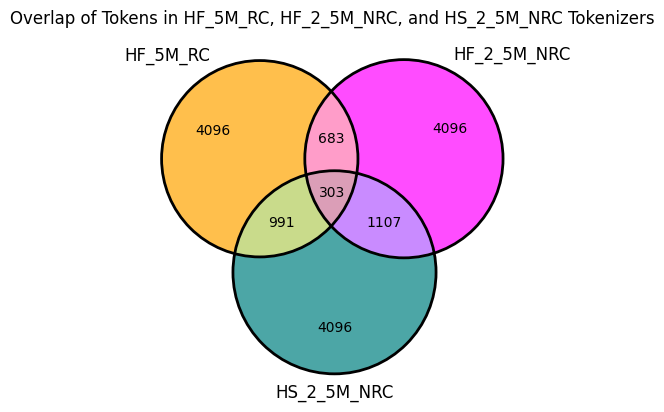

In [36]:
# depict venn diagram
venn3(subsets=(len(HF_5M_RC['model']['vocab']),
				len(HF_2_5M_NRC['model']['vocab']), 
				len(overlap_hf),
				len(HS_2_5M_NRC['model']['substitutions']), 
				len(overlap_hf_rc_hs), 
				len(overlap_hf_hs), 
				len(overlap_hf_hf_rc_hs)), 
      set_labels=('HF_5M_RC', 'HF_2_5M_NRC', 'HS_2_5M_NRC'), 
      set_colors=("orange", "magenta", "teal"), alpha=0.7)

# outline of circle line style and width
venn3_circles(subsets=(len(HF_5M_RC['model']['vocab']),
				len(HF_2_5M_NRC['model']['vocab']), 
				len(overlap_hf),
				len(HS_2_5M_NRC['model']['substitutions']), 
				len(overlap_hf_rc_hs), 
				len(overlap_hf_hs), 
				len(overlap_hf_hf_rc_hs)))

# title of the venn diagram
plt.title("Overlap of Tokens in HF_5M_RC, HF_2_5M_NRC, and HS_2_5M_NRC Tokenizers")
plt.show()

### Average Token Length

In [39]:
lens_hf_5M_rc_tokens = []
for token in hf_5M_rc_tokens:
	lens_hf_5M_rc_tokens.append(len(token))

avg_hf_5M_rc = statistics.mean(lens_hf_5M_rc_tokens)
median_hf_5M_rc = statistics.median(lens_hf_5M_rc_tokens)
print(f'Average token length HF 5M RC: {avg_hf_5M_rc}')
print(f'Median token length HF 5M RC: {median_hf_5M_rc}')

Average token length HF 5M RC: 6.640625
Median token length HF 5M RC: 7.0


In [38]:
lens_hf_2_5M_nrc_tokens = []
for token in hf_2_5M_nrc_tokens:
	lens_hf_2_5M_nrc_tokens.append(len(token))

avg_hf_2_5M_rc = statistics.mean(lens_hf_2_5M_nrc_tokens)
median_hf_2_5M_rc = statistics.median(lens_hf_2_5M_nrc_tokens)
print(f'Average token length HF 2.5M NRC: {avg_hf_2_5M_rc}')
print(f'Median token length HF 2.5M NRC: {median_hf_2_5M_rc}')

Average token length HF 2.5M NRC: 6.8486328125
Median token length HF 2.5M NRC: 7.0


In [40]:
lens_hs_2_5M_nrc_tokens = []
for token in hs_2_5M_nrc_tokens:
	lens_hs_2_5M_nrc_tokens.append(len(token))

avg_hs_2_5M_nrc = statistics.mean(lens_hs_2_5M_nrc_tokens)
median_hs_2_5M_nrc = statistics.median(lens_hs_2_5M_nrc_tokens)
print(f'Average token length HS 2.5M NRC: {avg_hs_2_5M_nrc}')
print(f'Median token length HS 2.5M NRC: {median_hs_2_5M_nrc}')

Average token length HS 2.5M NRC: 5.8994140625
Median token length HS 2.5M NRC: 6.0
